# Chapter 6: Analyzing Geomodel Topology

In [291]:
import sys
sys.path.append("../../../")

import gempy as gp

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load example Model

First let's set up a very simple example model. For that we initialize the geo_data object with the correct model extent and the resolution we like. Then we load our data points from csv files and set the series and order the formations (stratigraphic pile).

In [2]:
geo_model = gp.create_model("Model_Tutorial6")
gp.init_data(
    geo_model, [0, 3000, 0, 20, 0, 2000], [50, 10, 67], 
    path_i="../../data/input_data/tut_chapter6/ch6_data_interf.csv", 
    path_o="../../data/input_data/tut_chapter6/ch6_data_fol.csv"
)
gp.map_series_to_surfaces(
    geo_model,
    {
        "fault": "Fault",
        "Rest": ('Layer 2', 'Layer 3', 'Layer 4', 'Layer 5')
    }
)
geo_model.set_is_fault(["fault"]);
gp.set_interpolation_data(geo_model)
sol = gp.compute_model(geo_model, compute_mesh=True)

Active grids: ['regular']
Fault colors changed. If you do not like this behavior, set change_color to False.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!


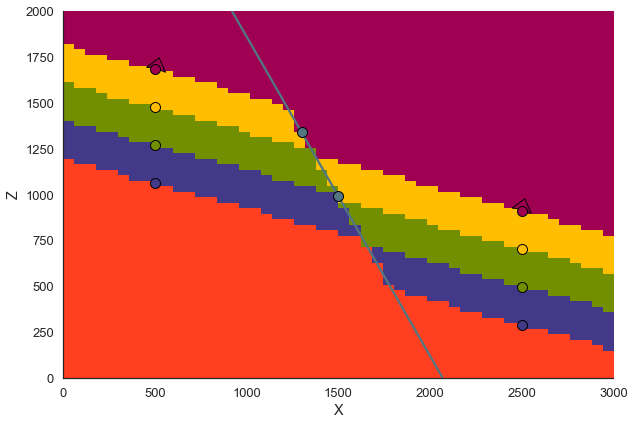

In [3]:
gp.plot.plot_section(geo_model, 5)

## Analyzing Topology

GemPy sports in-built functionality to analyze the topology of its models. All we need for this is our geo_data object, lithology block and the fault block. We input those into *gp.topology_compute* and get several useful outputs:

* an adjacency graph **G**, representing the topological relationships of the model
* the **centroids** of the all the unique topological regions in the model (x,y,z coordinates of their center) 
* a list of all the unique labels (labels_unique)
* two look-up-tables from the lithology id's to the node labels, and vice versa

In [4]:
from gempy.assets import topology as tp

In [5]:
edges, centroids = tp.compute_topology(geo_model)

The first output of the topology function is the `set` of edges representing topology relationships between unique geobodies of the block model. An edge is represented by a `tuple` of two `int` geobody (or node) labels:

In [6]:
edges

{(1, 2),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 3),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 9),
 (3, 10),
 (4, 5),
 (4, 10),
 (5, 10),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10)}

The second output is the centroids `dict`, mapping the unique geobody id's (graph node id's) to the geobody centroid position in grid coordinates:

In [38]:
centroids

{1: array([35.27893175,  4.5       , 50.19485658]),
 2: array([36.46666667,  4.5       , 29.14444444]),
 3: array([37.59756098,  4.5       , 21.62195122]),
 4: array([38.84563758,  4.5       , 14.00671141]),
 5: array([39.09550562,  4.5       ,  5.37640449]),
 6: array([ 9.79081633,  4.5       , 60.10204082]),
 7: array([10.17687075,  4.5       , 51.02721088]),
 8: array([11.37804878,  4.5       , 43.47560976]),
 9: array([12.51098901,  4.5       , 35.90659341]),
 10: array([13.659857  ,  4.5       , 15.34320735])}

After computing the model topology, we can overlay the topology graph over a model section:

## Visualizing topology
### 2-D Visualization of the Topology Graph

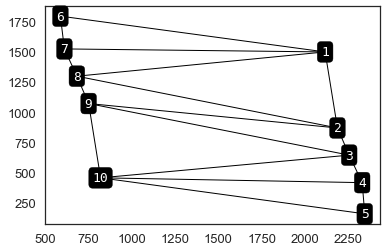

In [292]:
gp.plot.plot_topology(geo_model, edges, centroids)

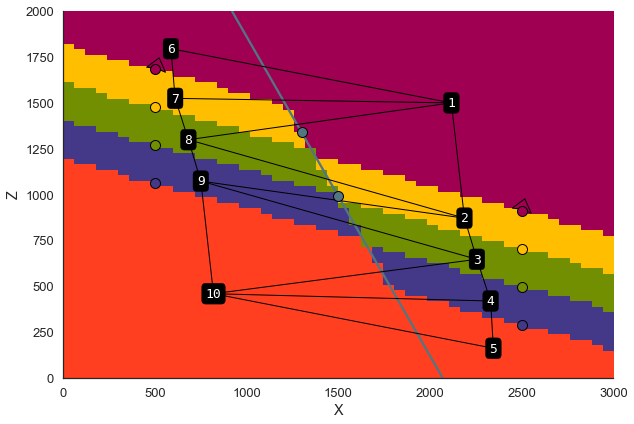

In [293]:
gp.plot.plot_section(geo_model, 5)
gp.plot.plot_topology(geo_model, edges, centroids)

### Adjacency Matrix

Another way to encode and visualize the geomodel topology is using an adjacency graph:

In [294]:
M = tp.get_adjacency_matrix(geo_model, edges, centroids)
print(M)

[[False  True False False False  True  True  True False False]
 [ True False  True False False False False  True  True False]
 [False  True False  True False False False False  True  True]
 [False False  True False  True False False False False  True]
 [False False False  True False False False False False  True]
 [ True False False False False False  True False False False]
 [ True False False False False  True False  True False False]
 [ True  True False False False False  True False  True False]
 [False  True  True False False False False  True False  True]
 [False False  True  True  True False False False  True False]]


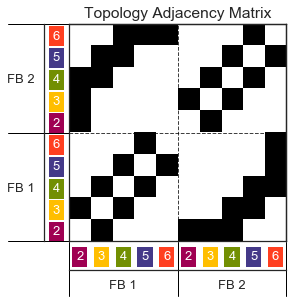

In [295]:
tp.plot_adjacency_matrix(geo_model, M)

### 3-D Visualization of the Topology Graph

You can also plot the topology in 3-D using GemPy's 3-D visualization toolkit powered by `pyvista`:

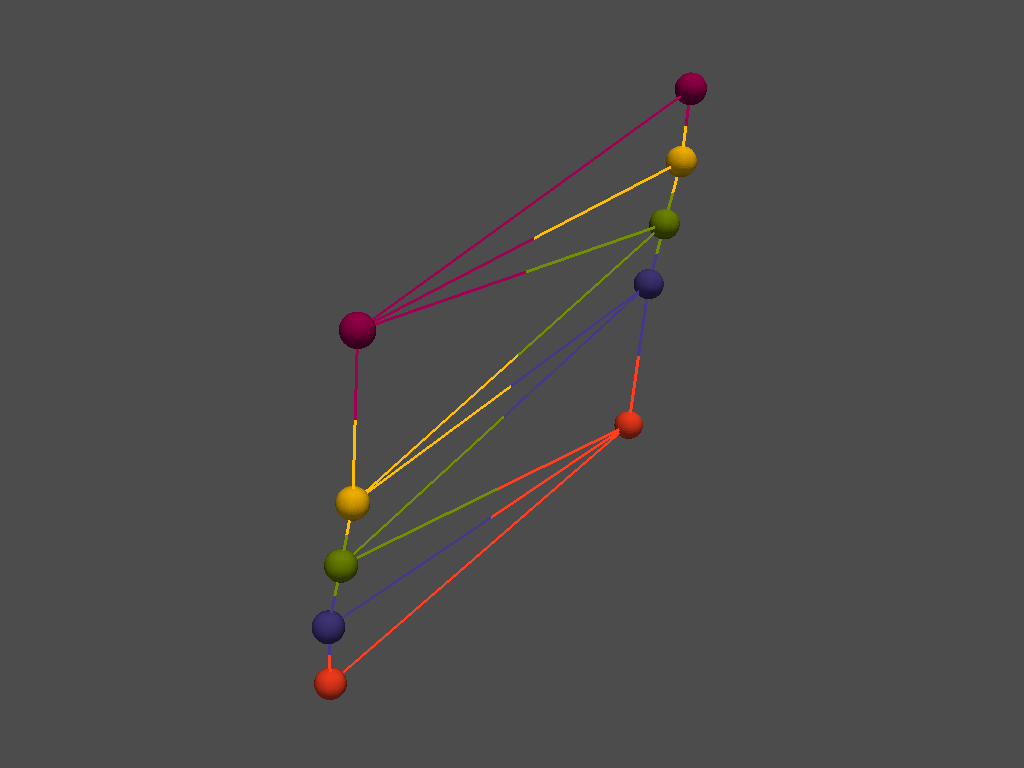

In [306]:
from gempy.plot import vista
gpv = vista.Vista(geo_model)
gpv.plot_topology(edges, centroids)
gpv.show()

## Look-up tables

The `topology` asset provides several look-up tables to work with the unique geobody topology id's.

Mapping node id's back to lithology / surface id's:

In [308]:
lith_lot = tp.get_lot_node_to_lith_id(geo_model, centroids)
lith_lot

{1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 2, 7: 3, 8: 4, 9: 5, 10: 6}

Figuring out which nodes are in which fault block:

In [309]:
fault_lot = tp.get_lot_node_to_fault_block(geo_model, centroids)
fault_lot

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

We can also easily map the lithology id to the corresponding topology id's:

In [311]:
tp.get_lot_lith_to_node_id(lith_lot)

{2: [1, 6], 3: [2, 7], 4: [3, 8], 5: [4, 9], 6: [5, 10]}

## Detailed node labeling

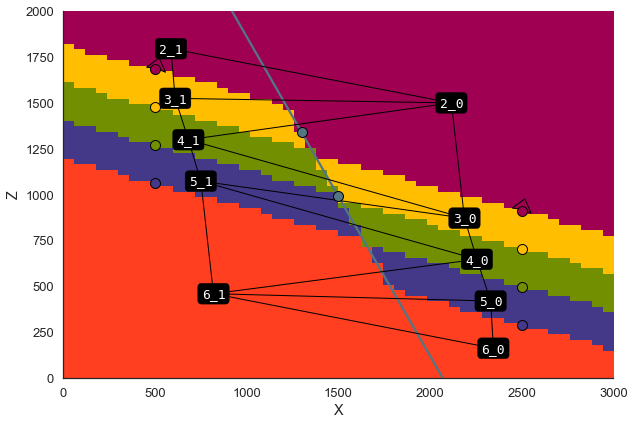

In [286]:
dedges, dcentroids = tp.get_detailed_labels(geo_model, edges, centroids)
gp.plot.plot_section(geo_model, 5)
gp.plot.plot_topology(geo_model, dedges, dcentroids)

In [312]:
dedges

{('2_0', '2_1'),
 ('2_0', '3_0'),
 ('2_0', '3_1'),
 ('2_0', '4_1'),
 ('2_1', '3_1'),
 ('3_0', '4_0'),
 ('3_0', '4_1'),
 ('3_0', '5_1'),
 ('3_1', '4_1'),
 ('4_0', '5_0'),
 ('4_0', '5_1'),
 ('4_0', '6_1'),
 ('4_1', '5_1'),
 ('5_0', '6_0'),
 ('5_0', '6_1'),
 ('5_1', '6_1'),
 ('6_0', '6_1')}

In [313]:
dcentroids

{'2_0': array([35.27893175,  4.5       , 50.19485658]),
 '3_0': array([36.46666667,  4.5       , 29.14444444]),
 '4_0': array([37.59756098,  4.5       , 21.62195122]),
 '5_0': array([38.84563758,  4.5       , 14.00671141]),
 '6_0': array([39.09550562,  4.5       ,  5.37640449]),
 '2_1': array([ 9.79081633,  4.5       , 60.10204082]),
 '3_1': array([10.17687075,  4.5       , 51.02721088]),
 '4_1': array([11.37804878,  4.5       , 43.47560976]),
 '5_1': array([12.51098901,  4.5       , 35.90659341]),
 '6_1': array([13.659857  ,  4.5       , 15.34320735])}

## Checking adjacency

So let's say we want to check if the puple layer (id 5) is connected across the fault to the yellow layer (id 3). For this we can make easy use of the detailed labeling and the `check_adjacency` function:

In [288]:
tp.check_adjacency(dedges, "5_1", "3_0")

True

We can also check all geobodies that are adjacent to the purple layer (id 5) on the left side of the fault (fault id 1):

In [290]:
tp.get_adjacencies(dedges, "5_1")

{'3_0', '4_0', '4_1', '6_1'}